In [92]:
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, butter, filtfilt, decimate
from scipy.signal.windows import hann
from scipy.stats import kstest, probplot, gaussian_kde, shapiro, entropy, multivariate_normal
import random
import mne
from pykalman import KalmanFilter
#from sklearn.preprocessing import scal

In [95]:
eeg_raw = mne.io.read_raw_cnt('data/6_3_20180802.cnt')

In [75]:
eeg = mne.baseline.rescale(eeg_raw.copy())

TypeError: rescale() missing 2 required positional arguments: 'times' and 'baseline'

In [97]:
data_matrix = eeg_raw.get_data()
#Frequency Tranform
signal = data_matrix
fs = 1000 #1000hz
duration = 4 #seconds
window_size = int(fs * duration)
hanning_window = hann(window_size)
f, t, Zxx = stft(signal, fs, nperseg=window_size, window=hanning_window, noverlap = 0)

In [98]:
print(len(t))
Zxx.shape

781


(66, 2001, 781)

In [6]:
def filter_signal(data, fs):
    high_cutoff = 50
    low_cutoff = 1
    high_cutoff_normalized = high_cutoff/2/fs
    low_cutoff_normalized = low_cutoff/2/fs
    b,a = butter(N=2,Wn=[low_cutoff_normalized,high_cutoff_normalized],btype = 'band', analog = 'False')
    filtered_data = filtfilt(b,a,data)
    return filtered_data

In [7]:
#getting Power spectral density for each channel at each frequeny band
def get_PSD(data_all_channels, channel):
    #first do short time fourier series transform
    fs = 10**3 #1000hz
    duration = 4 #seconds
    window_size = int(fs * duration)
    hanning_window = hann(window_size) 
    data = data_all_channels[channel,:]
    frequencies, psd = welch(data, fs=fs, window=hanning_window, nperseg=window_size, noverlap=0)
    return frequencies,psd

In [8]:
f, p = get_PSD(data_matrix,1)
p = np.log10(p)
plt.figure(figsize=(5,10))
plt.subplot(5,1,1)
plt.plot(f[4:16],p[4:16])
plt.subplot(5,1,2)
plt.plot(f[16:32],p[16:32])
plt.subplot(5,1,3)
plt.plot(f[32:64],p[32:64])
plt.subplot(5,1,4)
plt.plot(f[64:124],p[64:124])
plt.subplot(5,1,5)
plt.plot(f[124:200],p[124:200])
plt.tight_layout()
plt.show()

NameError: name 'welch' is not defined

In [9]:
filenames = ["1_1_20180804.cnt","1_2_20180810.cnt","1_3_20180808.cnt","2_1_20180416.cnt","2_2_20180419.cnt","2_3_20180425.cnt"]#"3_1_20180414.cnt","3_2_20180419.cnt","3_3_20180424.cnt","4_1_20180414.cnt","4_2_20180417.cnt","4_3_20180501.cnt","5_1_20180719.cnt","5_2_20180728.cnt","5_3_20180723.cnt","6_1_20180713.cnt","6_2_20180731.cnt","6_3_20180802.cnt","7_1_20180411.cnt","7_2_20180418.cnt","7_3_20180422.cnt","8_1_20180717.cnt","8_2_20180802.cnt","8_3_20180726.cnt","9_1_20180724.cnt","9_2_20180804.cnt","9_3_20180728.cnt","10_1_20180507.cnt","10_2_20180524.cnt","10_3_20180626.cnt","11_1_20180510.cnt","11_2_20180508.cnt","11_3_20180522.cnt","12_1_20180515.cnt","12_2_20180508.cnt","12_3_20180517.cnt","13_1_20180720.cnt","13_2_20180806.cnt","13_3_20180725.cnt","14_1_20180420.cnt","14_2_20180423.cnt","14_3_20180427.cnt","15_1_20180724.cnt","15_2_20180807.cnt","15_3_20180730.cnt","16_1_20180805.cnt","16_2_20180815.cnt","16_3_20180813.cnt"]
stfts = []
for filename in filenames:
    path = "data/" + filename
    eeg_raw = mne.io.read_raw_cnt(path)
    data_matrix = eeg_raw.get_data()
    #downsample frequency
    signal = decimate(data_matrix,5)
    #filter signal
    signal = filter_signal(signal,200)
    #Frequency Tranform
    fs = 200 #1000hz
    duration = 4 #seconds
    window_size = int(fs * duration)
    hanning_window = hann(window_size)
    f, t, Zxx = stft(signal, fs, nperseg=window_size, window=hanning_window, noverlap = 0, scaling = 'psd')
    stfts.append( (f,t,Zxx))
    

C:\Users\Chris\AppData\Local\Temp\ipykernel_28132\2959688055.py:5: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  eeg_raw = mne.io.read_raw_cnt(path)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28132\2959688055.py:5: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  eeg_raw = mne.io.read_raw_cnt(path)
C:\Users\Chris\AppData\Local\Temp\ipykernel_28132\2959688055.py:5: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  eeg_raw = mne.io.read_raw_cnt(path)


In [10]:
magnitude = []
channel_num = random.randint(0,65)
person = random.randint(1,2)
for i in range(100):
    sig = random.randint(person*3 - 3,person*3 - 1)
    f = stfts[sig][0]
    t = stfts[sig][1]
    Zxx = stfts[sig][2]
    freq_band = np.where(f ==1)[0]
    random_time = random.randint(600,len(t)-50)
    stft_band = np.abs(Zxx[channel_num,freq_band,random_time])
    stft_avg = np.average(stft_band)
    magnitude.append(stft_avg)
    
    

In [280]:
Zxx.shape

(66, 401, 777)

In [281]:
t.shape

(777,)

In [7]:
pdf = lambda x: kde.evaluate(x)

In [272]:
scaled_data = scale(magnitude)
scaled_data

array([-6.46918554e-01,  5.19801851e-01, -7.71420492e-01, -6.99198054e-01,
        8.49707389e-02, -1.85117868e-01, -8.72636578e-01,  3.61406783e-01,
       -8.99669477e-01,  1.34312108e+00, -1.50300307e-01, -5.83013422e-01,
       -1.42911881e-01, -8.45508055e-01, -2.17930452e-01, -1.17306921e+00,
       -1.02719329e+00, -5.34119929e-01,  1.39245255e+00, -7.41992311e-01,
       -4.41789147e-01, -1.15838128e+00, -7.44598568e-01, -1.22094658e+00,
        8.36568692e-01, -9.95485589e-01, -6.67830083e-01,  8.10620895e-01,
       -6.83747476e-01, -1.31698438e+00,  6.23555415e-01,  2.82758932e-01,
        5.02691997e-01,  4.83045673e-01,  2.36654321e+00,  8.10620895e-01,
       -3.86827116e-01, -2.60509073e-01, -1.43258217e-01, -7.44598568e-01,
       -7.46879516e-01, -1.68259178e-01, -6.83747476e-01,  7.23583206e-01,
       -6.46918554e-01, -9.80510732e-01, -1.16926198e+00,  3.07367629e-03,
       -1.15838128e+00,  1.12321005e+00,  3.54443752e-02, -1.04367126e+00,
        1.50350310e-01, -

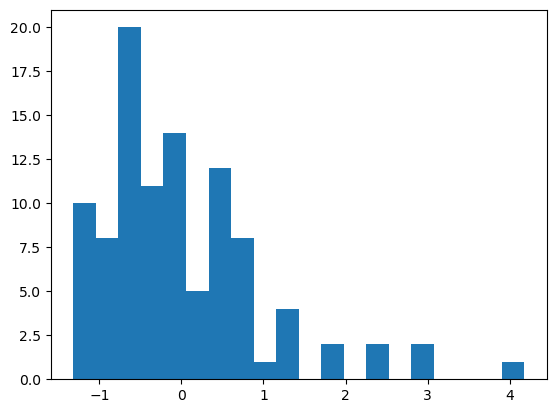

In [273]:
bin_edges = np.linspace(min(scaled_data), max(scaled_data), 21)  # Manually set bin edges
plt.hist(scaled_data, bins = bin_edges) #bins=100, density=True, alpha=0.5, color='blue')
plt.show()

In [257]:
print(max(scaled_data))
blah = scaled_data

5.395638735831418


In [258]:
blah = blah[blah <= 4]

In [259]:
max(blah)

3.385611606461902

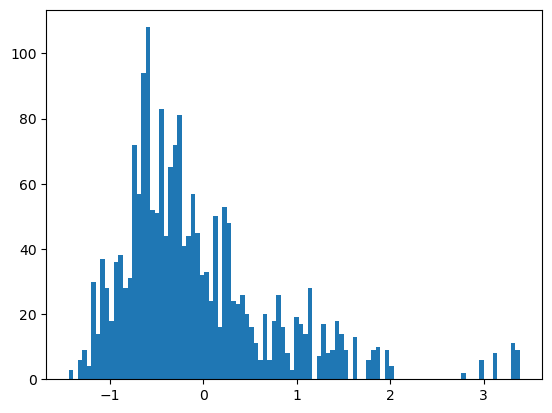

In [274]:
plt.hist(blah,bins = 100)
plt.show()

In [275]:
statististic, pvalue = kstest(magnitude, 'norm')
print(pvalue)

1.21314343352917e-23


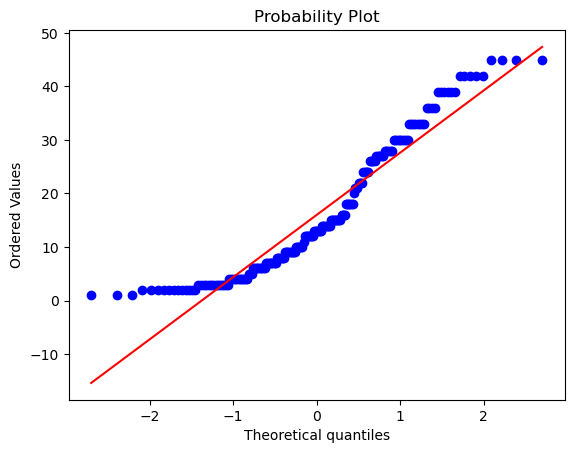

In [27]:
probplot(magnitude,dist="norm", plot = plt)
plt.show()

In [28]:
shapiro(magnitude)

ShapiroResult(statistic=0.9063940048217773, pvalue=6.545812225589032e-10)

In [2]:
#df = pd.read_csv("data/features.csv")
df = pd.read_csv("data/PSD_threshold2_group.csv")
df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,1,1,Happy,0.0,1,8.407449e-07,6.891883e-07,4.953179e-07,6.837126e-07,8.367799e-07,...,7.705141e-07,5.346406e-07,3.791835e-07,2.910350e-07,1.713884e-07,1.170296e-06,5.678492e-07,4.115600e-07,2.899759e-07,2.025023e-07
1,1,1,Happy,4.0,1,1.787569e-06,7.173811e-07,7.199926e-07,1.006420e-06,1.109860e-06,...,1.116061e-06,1.212160e-06,5.283207e-07,3.619288e-07,2.219968e-07,1.827883e-06,1.132092e-06,6.354163e-07,4.099380e-07,2.158568e-07
2,1,1,Happy,8.0,1,1.589412e-06,1.015863e-06,5.926907e-07,1.244373e-06,1.449418e-06,...,1.479305e-06,7.988407e-07,7.000771e-07,4.973072e-07,2.355082e-07,1.229064e-06,8.767346e-07,7.258641e-07,5.292473e-07,2.571811e-07
3,1,1,Happy,12.0,1,2.323724e-06,1.133758e-06,7.281839e-07,9.479943e-07,1.074735e-06,...,1.522798e-06,1.156365e-06,9.204237e-07,6.037415e-07,2.379757e-07,1.568563e-06,1.174753e-06,8.869110e-07,5.560638e-07,2.290777e-07
4,1,1,Happy,16.0,1,1.127012e-06,8.190109e-07,5.975804e-07,1.072068e-06,9.231113e-07,...,1.165243e-06,6.602174e-07,7.741085e-07,3.796362e-07,2.938656e-07,1.285646e-06,8.746853e-07,9.211723e-07,4.397763e-07,2.941491e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,45,6.528485e-07,4.885348e-07,5.715792e-07,1.485389e-06,1.239473e-06,...,1.078552e-06,2.603102e-07,3.292147e-07,2.937082e-07,2.887943e-07,1.070320e-06,2.595987e-07,3.251358e-07,2.972442e-07,2.948759e-07
30108,16,3,Disgust,164.0,45,5.783099e-07,5.003411e-07,6.898199e-07,1.501981e-06,1.252483e-06,...,5.752345e-07,4.532435e-07,3.647882e-07,3.276059e-07,2.550572e-07,5.727614e-07,4.413885e-07,3.637769e-07,3.360797e-07,2.545795e-07
30109,16,3,Disgust,168.0,45,5.351505e-07,4.612941e-07,8.389297e-07,1.614279e-06,1.232964e-06,...,1.289062e-06,7.354904e-07,3.464173e-07,3.043091e-07,2.742960e-07,1.267661e-06,7.357274e-07,3.432318e-07,3.066359e-07,2.803983e-07
30110,16,3,Disgust,172.0,45,6.016532e-07,7.435340e-07,7.464990e-07,1.707475e-06,1.449628e-06,...,5.285553e-07,3.695001e-07,2.570208e-07,2.932759e-07,2.832862e-07,5.351136e-07,3.727680e-07,2.517090e-07,2.928636e-07,2.805120e-07


In [33]:
channel_num = 0#random.randint(0,65)
Freq_Band = 0#random.randint(0,4)
magnitude = []
for i in range(1000):
    row = random.randint(0,30111)
    magnitude.append(df.iloc[row,5*channel_num + 4 + Freq_Band])
    

In [34]:
magnitude

[33,
 30,
 42,
 12,
 4,
 42,
 16,
 30,
 28,
 2,
 6,
 6,
 4,
 16,
 13,
 2,
 42,
 18,
 11,
 20,
 18,
 7,
 4,
 9,
 11,
 42,
 8,
 24,
 36,
 7,
 39,
 30,
 1,
 30,
 24,
 8,
 8,
 4,
 15,
 33,
 14,
 39,
 18,
 12,
 42,
 6,
 6,
 42,
 4,
 24,
 3,
 8,
 21,
 14,
 24,
 36,
 39,
 28,
 13,
 2,
 30,
 11,
 2,
 6,
 2,
 10,
 18,
 45,
 33,
 28,
 10,
 9,
 4,
 33,
 8,
 28,
 26,
 20,
 15,
 16,
 27,
 15,
 9,
 3,
 15,
 6,
 8,
 28,
 13,
 10,
 42,
 12,
 16,
 15,
 39,
 28,
 6,
 18,
 6,
 14,
 11,
 42,
 9,
 1,
 22,
 16,
 4,
 27,
 4,
 14,
 6,
 18,
 13,
 6,
 10,
 33,
 15,
 18,
 21,
 27,
 14,
 10,
 22,
 4,
 6,
 10,
 14,
 22,
 12,
 3,
 14,
 13,
 13,
 30,
 33,
 42,
 2,
 13,
 16,
 12,
 15,
 12,
 33,
 10,
 20,
 6,
 6,
 27,
 15,
 12,
 10,
 5,
 6,
 12,
 8,
 3,
 2,
 3,
 14,
 14,
 33,
 27,
 8,
 6,
 12,
 5,
 22,
 28,
 3,
 6,
 28,
 33,
 22,
 10,
 33,
 15,
 28,
 4,
 7,
 10,
 33,
 3,
 2,
 11,
 14,
 27,
 39,
 15,
 12,
 24,
 8,
 15,
 13,
 10,
 15,
 2,
 16,
 39,
 9,
 12,
 9,
 11,
 22,
 6,
 11,
 15,
 7,
 36,
 15,
 11,
 13,
 3,
 8,
 26

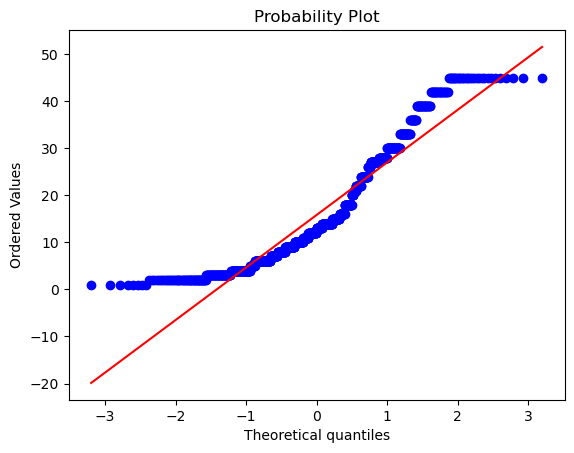

In [35]:
probplot(magnitude,dist="norm", plot = plt)
plt.show()

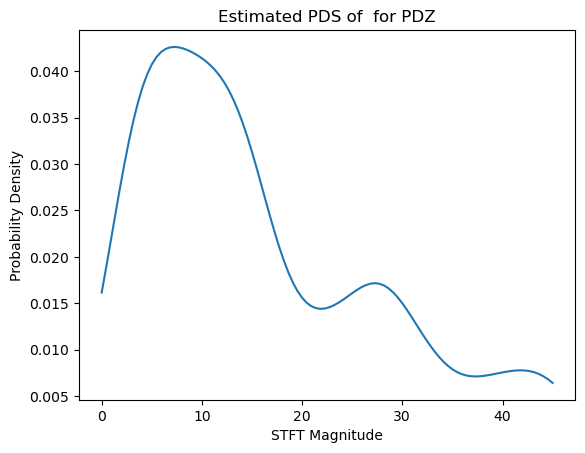

In [38]:
kde = gaussian_kde(magnitude)
    
# Plot the estimated PDF
plt.figure()
plt.plot(np.linspace(0, np.max(magnitude), 100), pdf(np.linspace(0, np.max(magnitude), 100)))
plt.title(f'Estimated PDS of  for PDZ')
plt.xlabel('STFT Magnitude')
plt.ylabel('Probability Density')
plt.show()

(array([44., 36., 33., 21.,  8., 16., 15., 12.,  6.,  9.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

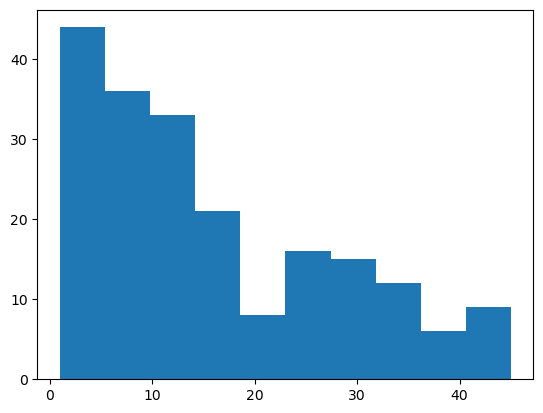

In [26]:
plt.hist(magnitude)

In [16]:
df_de = df.iloc[:,:4]

for i in range(330):
    kde = gaussian_kde(df.iloc[:,i+4])
    de = entropy(kde)
    df_de = df_de.join(df.iloc[:,i+4], on=None, how='left', lsuffix='', rsuffix='', sort=False)

TypeError: unsupported operand type(s) for *: 'float' and 'gaussian_kde'

,Subject,Session,Label,Time_Slot,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FPZ_Delta,...,VEO_Delta,VEO_Theta,VEO_Alpha,VEO_Beta,VEO_Gamma,HEO_Delta,HEO_Theta,HEO_Alpha,HEO_Beta,HEO_Gamma
0,1,1,Happy,0.0,2.310490e-10,2.226679e-10,3.199241e-10,8.760261e-11,1.666392e-11,2.815910e-10,...,1.965086e-09,5.324677e-10,2.703118e-10,1.682851e-10,6.666998e-11,6.479193e-10,2.489369e-10,1.857305e-10,8.502252e-11,3.225257e-11
1,1,1,Happy,4.0,1.729205e-10,4.549018e-10,2.643050e-10,1.329855e-10,1.693944e-11,2.661235e-10,...,1.380827e-09,3.653005e-10,2.237797e-10,1.130317e-10,1.620689e-11,3.683325e-10,3.706343e-10,1.808961e-10,1.024681e-10,1.306083e-11
2,1,1,Happy,8.0,2.731963e-10,5.400261e-10,4.600286e-10,1.606439e-10,2.355153e-11,1.822494e-10,...,4.136188e-10,3.300779e-10,2.100802e-10,1.146778e-10,2.484824e-11,5.262903e-10,2.562573e-10,2.313475e-10,1.003573e-10,1.471831e-11
3,1,1,Happy,12.0,2.271188e-10,5.794234e-10,3.651636e-10,1.518417e-10,2.204066e-11,1.932335e-10,...,1.680007e-10,2.230655e-10,1.957811e-10,1.128423e-10,2.399405e-11,1.488308e-10,2.391101e-10,1.647314e-10,8.338088e-11,1.264441e-11
4,1,1,Happy,16.0,3.159288e-10,4.360920e-10,3.018459e-10,1.531429e-10,2.370164e-11,3.663104e-10,...,8.672135e-10,2.732728e-10,2.060720e-10,1.163695e-10,2.125499e-11,2.728573e-10,2.330418e-10,1.712994e-10,9.414444e-11,1.347904e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30024,16,3,Disgust,160.0,6.440775e-10,1.258800e-09,7.181974e-10,3.934179e-10,7.405379e-11,5.944613e-10,...,1.036680e-09,1.478890e-10,1.004278e-10,6.144625e-11,1.324190e-11,2.631244e-10,8.222688e-10,5.028026e-10,2.626615e-10,4.149976e-11
30025,16,3,Disgust,164.0,8.573271e-10,8.568241e-10,8.007308e-10,3.340179e-10,6.904406e-11,1.046596e-09,...,1.239793e-09,1.970823e-10,9.565354e-11,7.286433e-11,1.229751e-11,1.460961e-09,7.183621e-10,5.803166e-10,2.755079e-10,4.234567e-11
30026,16,3,Disgust,168.0,4.083962e-10,8.646441e-10,6.780807e-10,4.009462e-10,6.665311e-11,4.534829e-10,...,4.537761e-10,1.393013e-10,9.141419e-11,5.593667e-11,1.356263e-11,2.475419e-10,7.184580e-10,5.591661e-10,2.423098e-10,4.085789e-11
30027,16,3,Disgust,172.0,5.990894e-10,9.338726e-10,9.099238e-10,3.924947e-10,6.929990e-11,6.089508e-10,...,5.747011e-10,1.929877e-10,1.818717e-10,9.680438e-11,1.200804e-11,7.758901e-10,8.539049e-10,5.348091e-10,2.784452e-10,4.691595e-11


In [335]:
for i in range(3):

TypeError: unsupported operand type(s) for *: 'gaussian_kde' and 'float'

In [363]:
print(entropy(magnitude))

10.127424578279193


In [ ]:
window_size = 30

In [382]:
from asrpy import ASR, asr_calibrate, asr_process

In [372]:

data_matrix = eeg_raw.get_data()
data_matrix.shape

(66, 3117520)

In [379]:
signal = decimate(data_matrix[1],5)
signal = filter_signal(signal,200)
M, T = asr_calibrate()

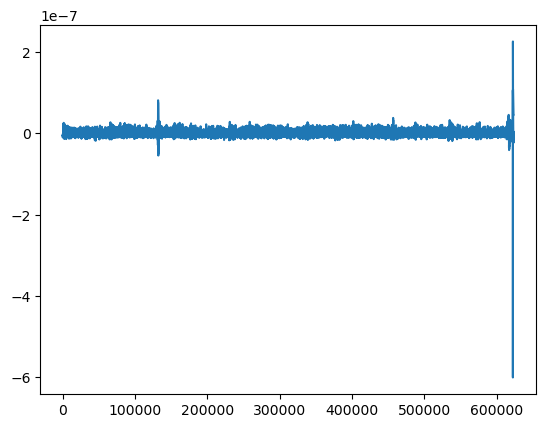

In [380]:
plt.plot(signal)
plt.show()

In [386]:
asr = ASR(sfreq = eeg_raw.info["sfreq"],cutoff = 15)
asr.fit(eeg_raw)

AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [387]:
df = pd.read_csv("data/features.csv")
df

,Subject,Session,Label,Time_Slot,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FPZ_Delta,...,VEO_Delta,VEO_Theta,VEO_Alpha,VEO_Beta,VEO_Gamma,HEO_Delta,HEO_Theta,HEO_Alpha,HEO_Beta,HEO_Gamma
0,1,1,Happy,0.0,-5.202927,-5.152625,-4.990170,-5.050977,-5.387588,-5.159864,...,-4.737983,-4.963258,-5.026734,-4.909189,-5.086407,-4.979737,-5.129125,-5.108694,-5.057814,-5.245038
1,1,1,Happy,4.0,-5.265769,-4.997481,-5.031642,-4.960337,-5.383969,-5.172151,...,-4.814623,-5.045115,-5.067784,-4.995640,-5.393569,-5.101572,-5.041967,-5.113980,-5.016945,-5.440434
2,1,1,Happy,8.0,-5.166455,-4.960232,-4.911302,-4.919308,-5.312409,-5.254359,...,-5.076392,-5.067132,-5.081502,-4.992500,-5.300771,-5.024080,-5.122102,-5.060562,-5.021465,-5.414490
3,1,1,Happy,12.0,-5.206566,-4.944942,-4.961450,-4.931544,-5.326807,-5.241651,...,-5.272037,-5.152224,-5.096809,-4.996004,-5.308367,-5.298346,-5.137141,-5.134306,-5.061706,-5.447470
4,1,1,Happy,16.0,-5.134898,-5.006651,-5.002802,-4.929691,-5.311030,-5.102768,...,-4.915630,-5.108142,-5.085685,-4.989320,-5.334688,-5.166725,-5.142723,-5.125816,-5.035342,-5.433589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,-4.980223,-4.776461,-4.814572,-4.724813,-5.063645,-4.997631,...,-4.876870,-5.241472,-5.241767,-5.127992,-5.437444,-5.174612,-4.868933,-4.891995,-4.812541,-5.189396
30108,16,3,Disgust,164.0,-4.918119,-4.859994,-4.790951,-4.760355,-5.078856,-4.874803,...,-4.838018,-5.179116,-5.252344,-5.090982,-5.453510,-4.802373,-4.898268,-4.860862,-4.802173,-5.185014
30109,16,3,Disgust,168.0,-5.079152,-4.858021,-4.827054,-4.720697,-5.086509,-5.056412,...,-5.056272,-5.254462,-5.262187,-5.148391,-5.432247,-5.187868,-4.898239,-4.868924,-4.830054,-5.192781
30110,16,3,Disgust,172.0,-4.995947,-4.841296,-4.763192,-4.725323,-5.078053,-4.992401,...,-5.004972,-5.183675,-5.112812,-5.029292,-5.458683,-4.939792,-4.860735,-4.878595,-4.799870,-5.162759


In [422]:
df_blah = df.iloc[:,2:]
average_entropy = df_blah.groupby('Label').mean().reset_index()
average_entropy

,Label,Time_Slot,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FPZ_Delta,FPZ_Theta,FPZ_Alpha,...,VEO_Delta,VEO_Theta,VEO_Alpha,VEO_Beta,VEO_Gamma,HEO_Delta,HEO_Theta,HEO_Alpha,HEO_Beta,HEO_Gamma
0,Disgust,77.169811,-5.109313,-5.159356,-5.155396,-5.122765,-5.470655,-5.161416,-5.230717,-5.226248,...,-5.109944,-5.224531,-5.210785,-5.124189,-5.437146,-5.102096,-5.181529,-5.169463,-5.111035,-5.438248
1,Fear,102.275325,-5.096888,-5.155746,-5.148567,-5.118967,-5.468094,-5.151465,-5.230842,-5.223459,...,-5.080445,-5.225625,-5.214444,-5.130189,-5.436075,-5.081114,-5.198648,-5.188796,-5.127626,-5.449362
2,Happy,85.226837,-5.100674,-5.157003,-5.151279,-5.116965,-5.464542,-5.162748,-5.237987,-5.232433,...,-5.108058,-5.216060,-5.197988,-5.114034,-5.427200,-5.089639,-5.187359,-5.173630,-5.112634,-5.436275
3,Neutral,96.795756,-5.099429,-5.157637,-5.150752,-5.116798,-5.464344,-5.153597,-5.233391,-5.227013,...,-5.100367,-5.211369,-5.195425,-5.108662,-5.418700,-5.083666,-5.184288,-5.169497,-5.108568,-5.434022
4,Sad,113.366053,-5.091953,-5.155838,-5.150258,-5.116829,-5.462843,-5.143482,-5.230037,-5.224436,...,-5.074955,-5.217109,-5.204431,-5.120041,-5.427597,-5.065694,-5.188068,-5.175167,-5.113752,-5.434792


In [401]:
df_blah = df.drop('Label', axis = 1)
average_entropy = df_blah.groupby('Subject').mean().reset_index()
average_entropy

,Subject,Session,Time_Slot,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FPZ_Delta,FPZ_Theta,...,VEO_Delta,VEO_Theta,VEO_Alpha,VEO_Beta,VEO_Gamma,HEO_Delta,HEO_Theta,HEO_Alpha,HEO_Beta,HEO_Gamma
0,1,1.958023,96.981934,-5.138418,-5.032328,-5.027067,-4.979666,-5.349684,-5.167345,-5.116361,...,-5.137633,-5.205060,-5.168097,-5.075182,-5.405558,-5.127508,-5.122554,-5.098436,-5.021335,-5.387691
1,2,1.958023,96.981934,-5.146619,-5.190312,-5.184307,-5.135984,-5.435919,-5.154950,-5.215114,...,-5.046933,-5.021376,-4.979289,-4.902318,-5.256101,-5.034988,-5.010108,-5.001659,-4.978262,-5.329068
2,3,1.958023,96.981934,-5.161774,-5.212710,-5.220815,-5.215549,-5.554127,-5.170268,-5.251034,...,-5.156203,-5.242856,-5.194495,-5.131362,-5.490119,-5.030231,-5.099774,-5.115770,-5.102379,-5.459116
3,4,1.958023,96.981934,-5.114631,-5.134059,-5.124242,-5.099441,-5.440449,-5.133137,-5.178095,...,-5.090614,-5.241806,-5.245850,-5.129795,-5.391328,-5.133231,-5.200942,-5.179143,-5.119069,-5.437297
4,5,1.958023,96.981934,-5.179655,-5.334887,-5.361961,-5.341466,-5.654958,-5.178459,-5.351010,...,-5.127187,-5.307502,-5.314077,-5.265639,-5.549457,-5.093417,-5.312908,-5.316980,-5.239875,-5.531890
5,6,1.958023,96.981934,-5.104396,-5.230115,-5.236005,-5.196168,-5.568321,-5.103541,-5.227415,...,-5.074954,-5.258097,-5.263691,-5.189486,-5.498326,-5.139343,-5.273484,-5.255668,-5.163957,-5.493819
6,7,1.958023,96.981934,-5.033521,-5.130574,-5.180736,-5.244530,-5.704603,-5.691701,-5.775218,...,-5.152066,-5.298903,-5.335980,-5.338994,-5.717560,-5.679393,-5.717556,-5.703200,-5.656034,-5.899605
7,8,1.958023,96.981934,-5.117666,-5.261498,-5.280269,-5.249406,-5.567408,-5.120945,-5.279433,...,-5.109488,-5.295039,-5.308868,-5.209277,-5.523461,-5.119154,-5.327874,-5.302061,-5.200135,-5.507681
8,9,1.958023,96.981934,-5.015624,-5.193595,-5.180626,-5.131044,-5.446640,-5.022664,-5.229625,...,-5.048686,-5.209970,-5.200124,-5.097603,-5.365977,-4.866860,-5.198054,-5.187893,-5.098252,-5.383081
9,10,1.958023,96.981934,-5.079970,-5.230877,-5.197049,-5.157426,-5.482996,-5.084069,-5.266332,...,-5.098246,-5.238108,-5.184265,-5.060997,-5.332007,-5.065388,-5.281487,-5.241537,-5.139690,-5.416501


In [428]:
average_entropy_delta = average_entropy.iloc[:,2::5].T
average_entropy_delta

,0,1,2,3,4
FP1_Delta,-5.109313,-5.096888,-5.100674,-5.099429,-5.091953
FPZ_Delta,-5.161416,-5.151465,-5.162748,-5.153597,-5.143482
FP2_Delta,-5.109962,-5.099116,-5.103947,-5.102684,-5.094800
AF3_Delta,-5.197612,-5.192497,-5.203868,-5.194626,-5.186524
AF4_Delta,-5.162274,-5.153739,-5.157969,-5.156187,-5.151605
...,...,...,...,...,...
OZ_Delta,-5.224203,-5.218295,-5.221487,-5.217657,-5.207161
O2_Delta,-5.182183,-5.172977,-5.174298,-5.168496,-5.166749
CB2_Delta,-5.208732,-5.203788,-5.211545,-5.200516,-5.193705
VEO_Delta,-5.109944,-5.080445,-5.108058,-5.100367,-5.074955


In [59]:
eeg_raw = mne.io.read_raw_cnt('data/6_3_20180802.cnt', preload = 'True')
info = eeg_raw.info
info

Reading 0 ... 3117519  =      0.000 ...  3117.519 secs...


<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-02-08 19:46:51 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

In [436]:
evoked = mne.EvokedArray(average_entropy_delta, info)
evoked

Condition,
Data kind,average
Timepoints,5 samples
Channels,66 channels
Number of averaged epochs,1
Time range (secs),0.0 – 0.004
Baseline (secs),off


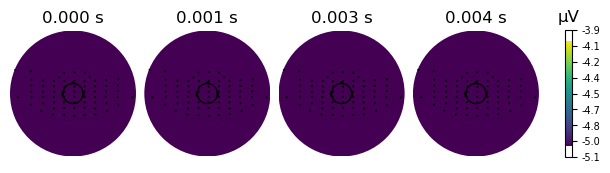

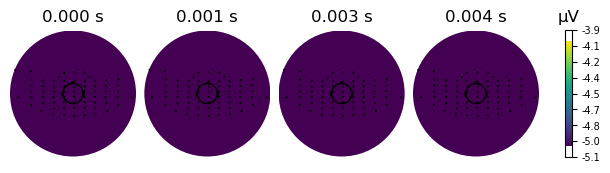

In [437]:

evoked.plot_topomap(ch_type='eeg', cmap='viridis', vlim = {-5,-4}) #scalings='auto')#, cmap='viridis')

In [37]:
eeg_raw.ch_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'VEO',
 'HEO']

In [38]:
test = eeg_raw.pick_channels(ch_names=['FPZ','VEO','HEO'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


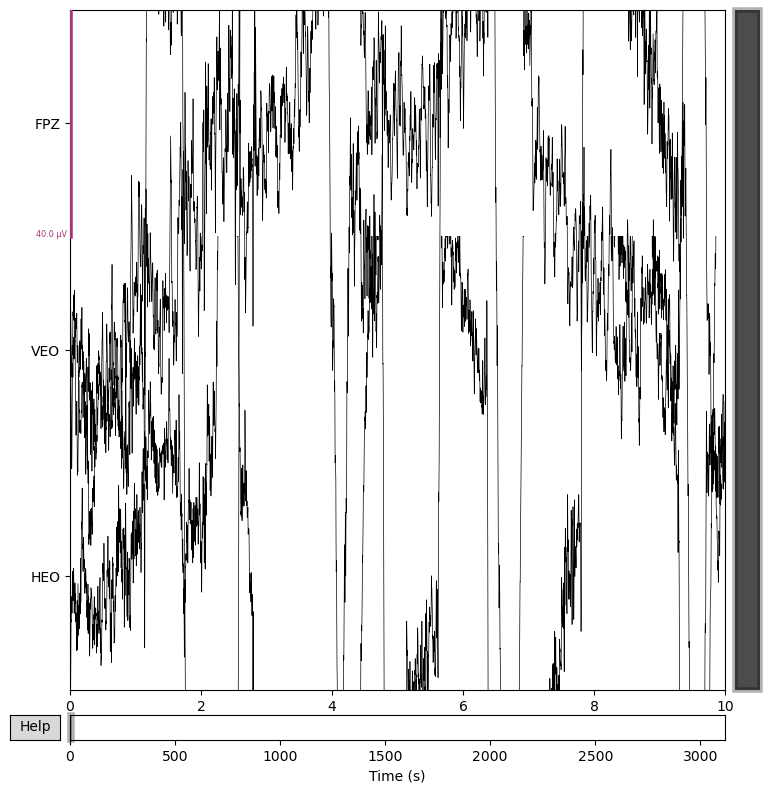

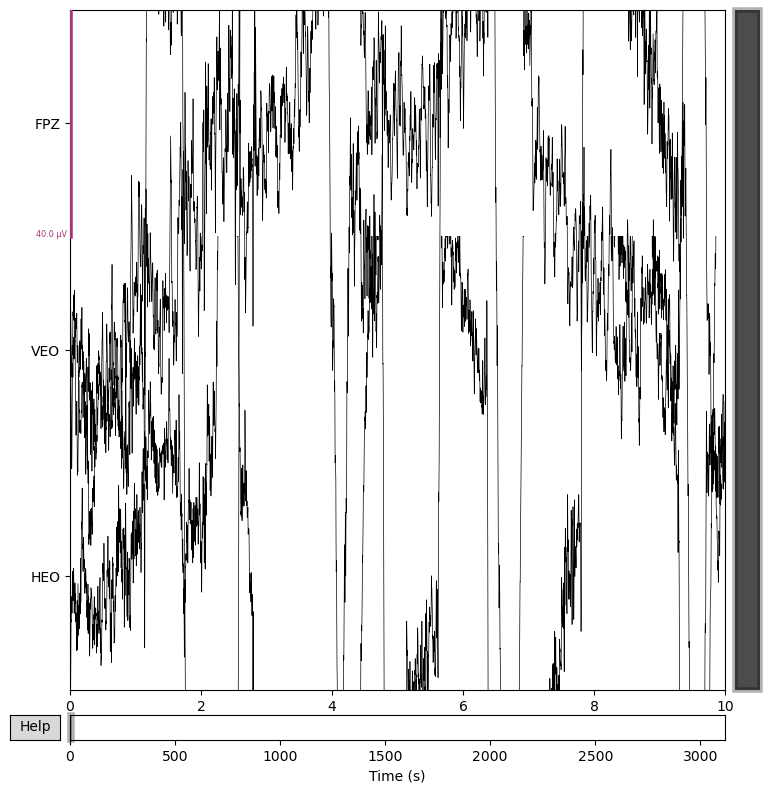

In [39]:
test.plot()

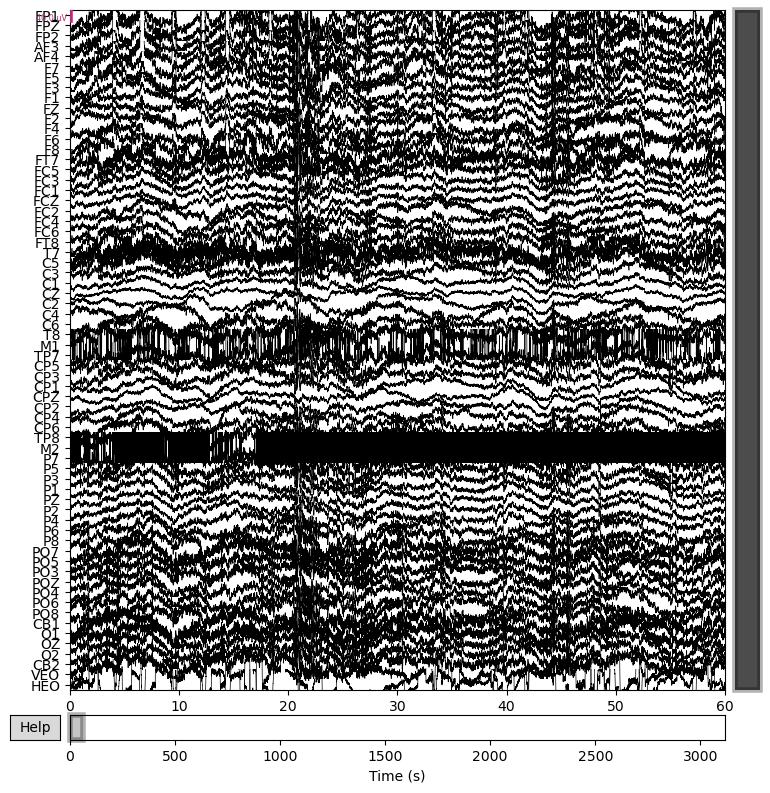

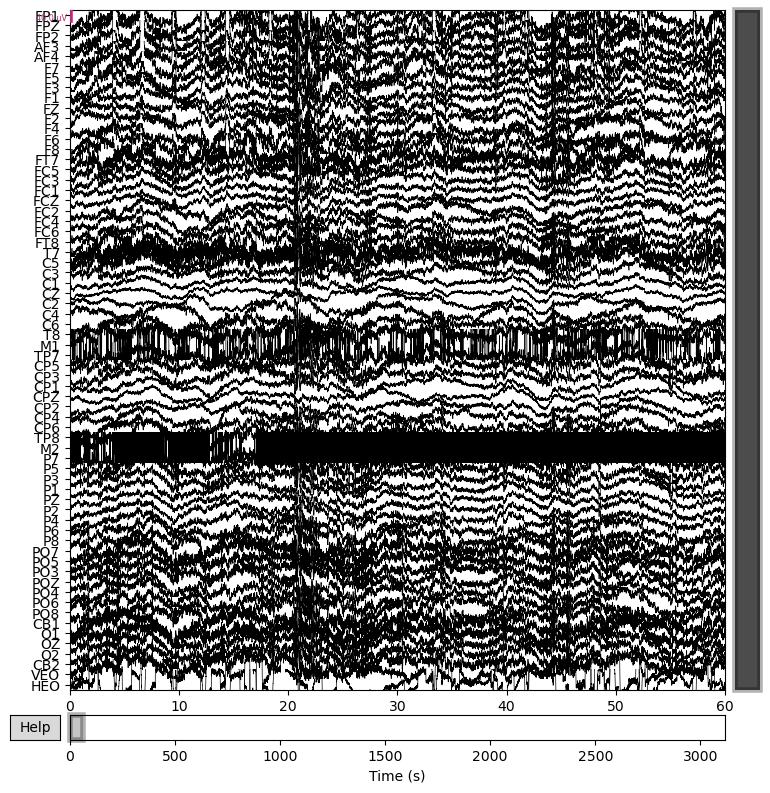

In [43]:
eeg_raw.plot(duration=60, proj=False, n_channels=len(eeg_raw.ch_names), remove_dc=False)

In [71]:
raw = eeg_raw.copy()
events = 1000*[30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
#events = mne.find_events(raw)
raw_car = raw.copy().set_eeg_reference('average', projection=True)
raw_car.ch_names


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'VEO',
 'HEO']

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


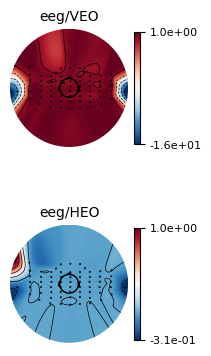

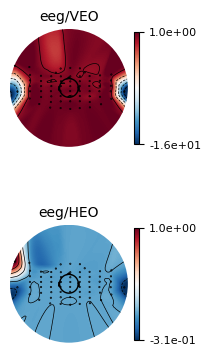

In [72]:
# Fit the regression model
weights = mne.preprocessing.EOGRegression(picks_artifact = ['VEO','HEO']).fit(raw_car)
raw_clean = weights.apply(raw_car, copy=True)

# Show the filter weights in a topomap
weights.plot()

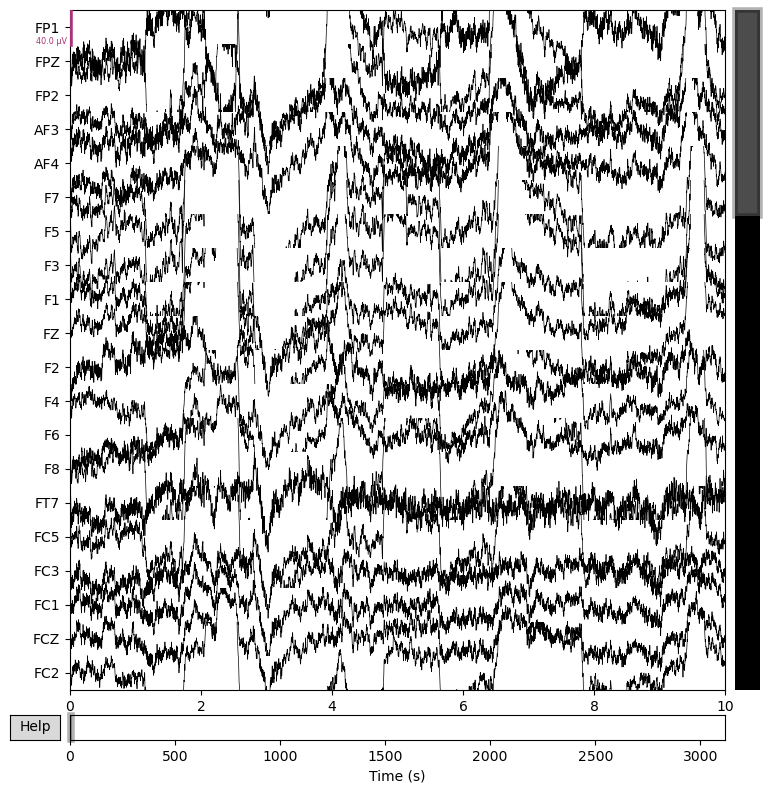

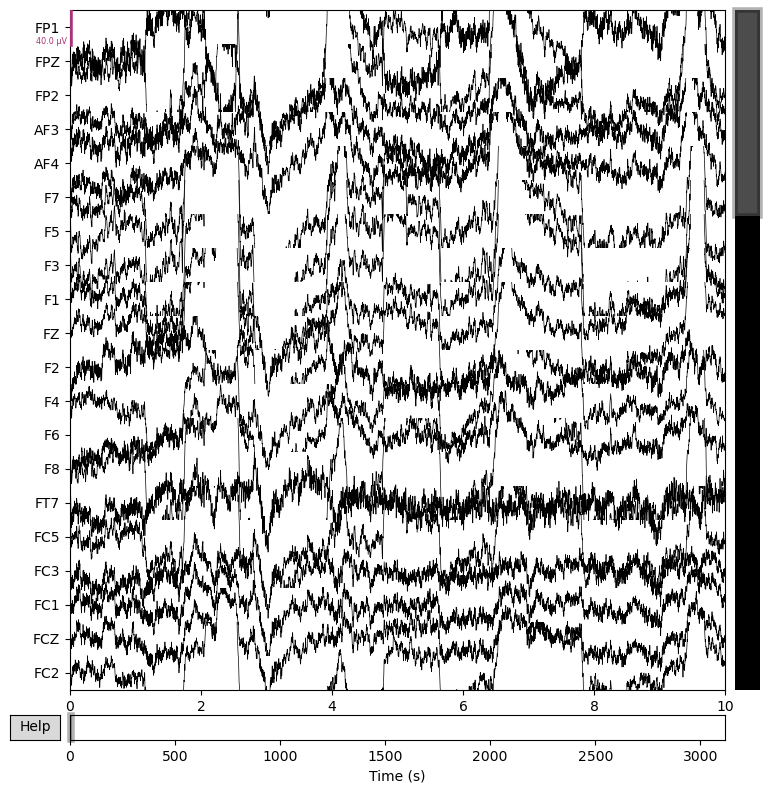

In [73]:
raw_clean.plot()

In [74]:
tmin, tmax = -0.1, 0.5
event_id = {"visual/left": 3, "visual/right": 4}
evoked_before = mne.Epochs(
    raw, events, event_id, tmin, tmax, baseline=(tmin, 0)
).average()
evoked_after = mne.Epochs(
    raw_clean, events, event_id, tmin, tmax, baseline=(tmin, 0)
).average()

# Create epochs after EOG correction
epochs_after = mne.Epochs(raw_clean, events, event_id, tmin, tmax, baseline=(tmin, 0))
evoked_after = epochs_after.average()

fig, ax = plt.subplots(
    nrows=3, ncols=2, figsize=(10, 7), sharex=True, sharey="row", layout="constrained"
)
evoked_before.plot(axes=ax[:, 0], spatial_colors=True)
evoked_after.plot(axes=ax[:, 1], spatial_colors=True)
fig.suptitle("Before --> After")

ValueError: events must be of shape (N, 3), got (15000,)

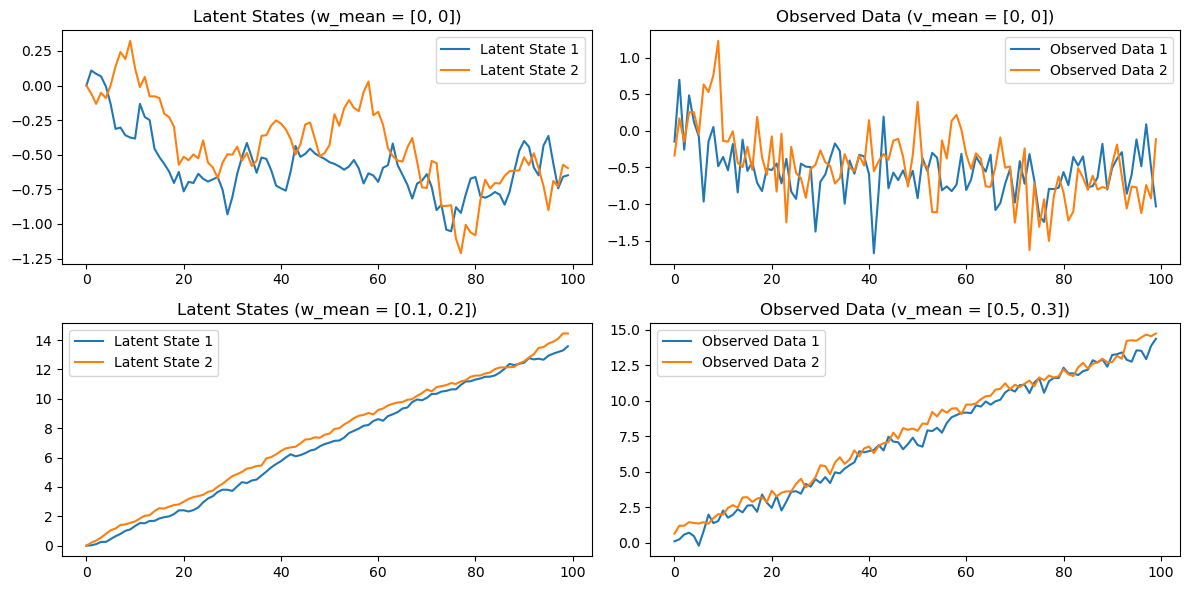

In [130]:
def generate_synthetic_data_with_means(A, Q, R, w_mean, v_mean, initial_state_mean, initial_state_covariance, n_samples=100):
    n_dim = len(A)
    latent_states = np.zeros((n_samples, n_dim))
    observed_data = np.zeros((n_samples, n_dim))

    for t in range(n_samples):
        if t == 0:
            latent_states[t] = initial_state_mean
        else:
            latent_states[t] = np.dot(A, latent_states[t-1]) + np.random.multivariate_normal(w_mean, Q)

        observed_data[t] = latent_states[t] + np.random.multivariate_normal(v_mean, R)

    return latent_states, observed_data

def linear_dynamical_system(A, Q, R, initial_state_mean, initial_state_covariance, observed_data):
    n_obs = len(observed_data)
    n_dim = len(A)

    # Initialization
    latent_states = np.zeros((n_obs, n_dim))
    predicted_states = np.zeros((n_obs, n_dim))
    state_covariances = np.zeros((n_obs, n_dim, n_dim))

    # Kalman Filter
    for t in range(n_obs):
        if t == 0:
            predicted_states[t] = initial_state_mean
            state_covariances[t] = initial_state_covariance
        else:
            # Prediction
            predicted_states[t] = np.dot(A, latent_states[t - 1])
            state_covariances[t] = np.dot(np.dot(A, state_covariances[t - 1]), A.T) + Q

            # Update (Kalman gain)
            kalman_gain = np.dot(np.dot(state_covariances[t], np.linalg.inv(state_covariances[t] + R)), A.T)
            
            # Correction
            latent_states[t] = predicted_states[t] + np.dot(kalman_gain, (observed_data[t] - predicted_states[t]))
            print(latent_states[t])
    return latent_states

def expectation_maximization(observed_data, A, Q, R, initial_state_mean, initial_state_covariance,
                              max_iterations=10, tolerance=1e-6):
    n_obs = len(observed_data)
    n_dim = len(A)

    # Initialize parameters
    current_A, current_Q, current_R = A, Q, R

    # EM iterations
    for iteration in range(max_iterations):
        # E-step
        latent_states = linear_dynamical_system(current_A, current_Q, current_R,
                                                initial_state_mean, initial_state_covariance, observed_data)

        # M-step
        # Update parameters based on the Kalman smoother
        A_sum = np.zeros((n_dim, n_dim))
        Q_sum = np.zeros((n_dim, n_dim))
        R_sum = np.zeros((n_dim, n_dim))

        for t in range(1, n_obs):
            A_sum += np.outer(latent_states[t], latent_states[t - 1])
            Q_sum += np.outer(latent_states[t] - np.dot(A, latent_states[t - 1]), latent_states[t] - np.dot(A, latent_states[t - 1]))
            R_sum += np.outer(observed_data[t] - latent_states[t], observed_data[t] - latent_states[t])

        current_A = A_sum / np.dot(latent_states[:-1].T, latent_states[:-1])
        current_Q = Q_sum / (n_obs - 1)
        current_R = R_sum / n_obs

        # Check for convergence
        if np.linalg.norm(current_A - A) < tolerance and np.linalg.norm(current_Q - Q) < tolerance and np.linalg.norm(current_R - R) < tolerance:
            break

    return current_A, current_Q, current_R, latent_states

def calculate_expectation(observed_data, A, Q, R, initial_state_mean, initial_state_covariance):
    # Forward pass (Filtering)
    filtered_states = linear_dynamical_system(A, Q, R,
                                              initial_state_mean, initial_state_covariance, observed_data)

    # Backward pass (Smoother)
    expectation_states = np.copy(filtered_states)
    n_obs = len(observed_data)

    for t in range(n_obs - 2, -1, -1):
        expectation_states[t] = filtered_states[t] + np.dot(np.dot(np.dot(Q, filtered_states[t + 1]), np.linalg.inv(Q + R)),
                                                             (expectation_states[t + 1] - filtered_states[t + 1]))

    return expectation_states

# Parameters
true_A = np.array([[0.9, 0.1], [0.1, 0.9]])
true_Q = np.diag([0.01, 0.01])
true_R = np.diag([0.1, 0.1])
initial_state_mean = np.zeros(2)
initial_state_covariance = np.diag([1.0, 1.0])

# Generate synthetic data with different means
w_mean_zero = np.zeros(2)
v_mean_zero = np.zeros(2)
latent_states_zero, observed_data_zero = generate_synthetic_data_with_means(true_A, true_Q, true_R,
                                                                            w_mean_zero, v_mean_zero,
                                                                            initial_state_mean, initial_state_covariance)

w_mean_nonzero = np.array([0.1, 0.2])
v_mean_nonzero = np.array([0.5, 0.3])
latent_states_nonzero, observed_data_nonzero = generate_synthetic_data_with_means(true_A, true_Q, true_R,
                                                                                  w_mean_nonzero, v_mean_nonzero,
                                                                                  initial_state_mean, initial_state_covariance)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(latent_states_zero[:, 0], label='Latent State 1')
plt.plot(latent_states_zero[:, 1], label='Latent State 2')
plt.title('Latent States (w_mean = [0, 0])')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(observed_data_zero[:, 0], label='Observed Data 1')
plt.plot(observed_data_zero[:, 1], label='Observed Data 2')
plt.title('Observed Data (v_mean = [0, 0])')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(latent_states_nonzero[:, 0], label='Latent State 1')
plt.plot(latent_states_nonzero[:, 1], label='Latent State 2')
plt.title('Latent States (w_mean = [0.1, 0.2])')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(observed_data_nonzero[:, 0], label='Observed Data 1')
plt.plot(observed_data_nonzero[:, 1], label='Observed Data 2')
plt.title('Observed Data (v_mean = [0.5, 0.3])')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_9796\1351718127.py:64: RuntimeWarning: invalid value encountered in add
  A_sum += np.outer(latent_states[t], latent_states[t - 1])
C:\Users\Chris\AppData\Local\Temp\ipykernel_9796\1351718127.py:65: RuntimeWarning: invalid value encountered in add
  Q_sum += np.outer(latent_states[t] - np.dot(A, latent_states[t - 1]), latent_states[t] - np.dot(A, latent_states[t - 1]))
C:\Users\Chris\AppData\Local\Temp\ipykernel_9796\1351718127.py:66: RuntimeWarning: invalid value encountered in add
  R_sum += np.outer(observed_data[t] - latent_states[t], observed_data[t] - latent_states[t])
C:\Users\Chris\AppData\Local\Temp\ipykernel_9796\1351718127.py:68: RuntimeWarning: invalid value encountered in divide
  current_A = A_sum / np.dot(latent_states[:-1].T, latent_states[:-1])


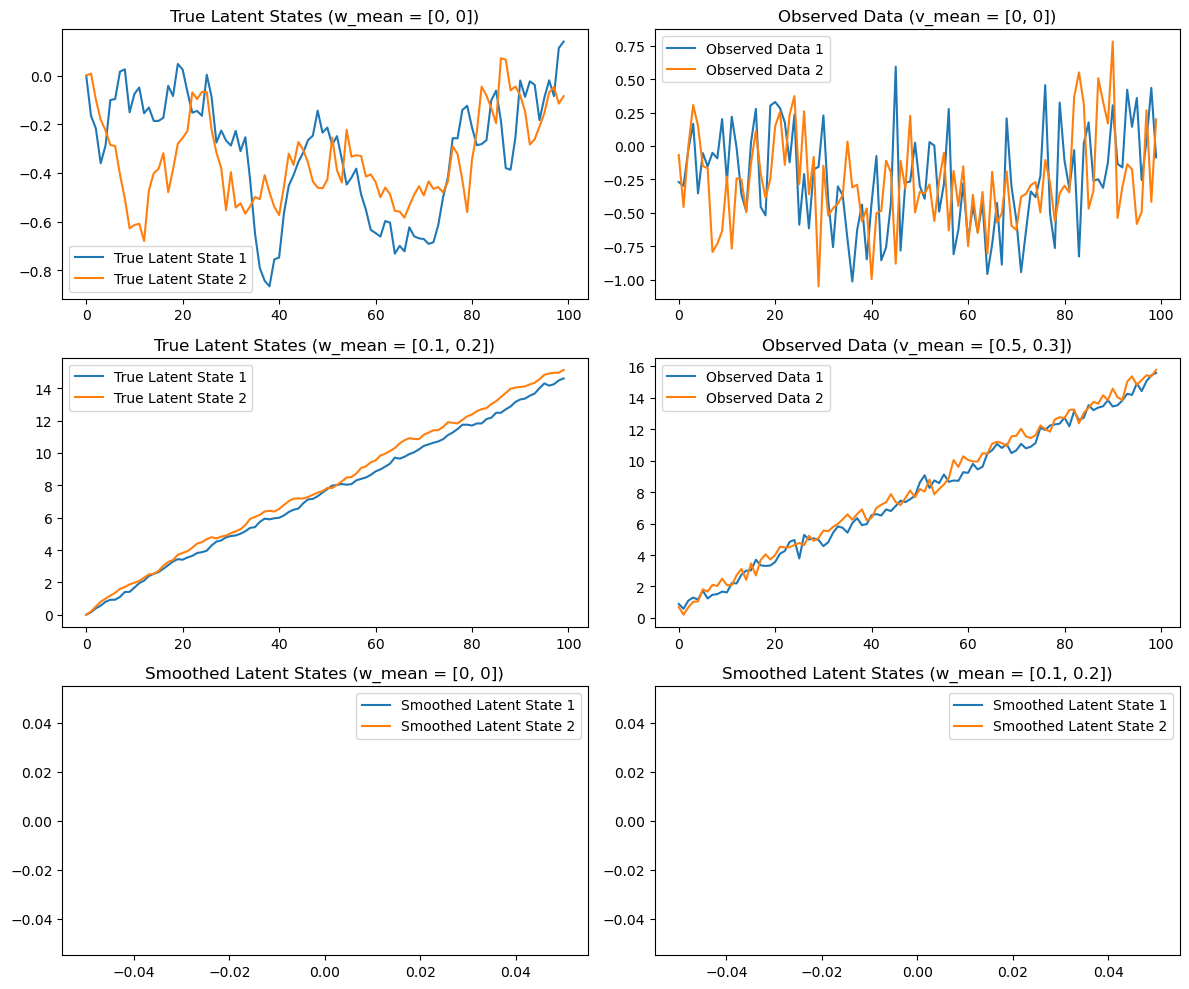

In [48]:
# Run EM algorithm
estimated_A, estimated_Q, estimated_R = expectation_maximization(observed_data_zero, true_A, true_Q, true_R,
                                                                  w_mean_zero, v_mean_zero, initial_state_mean, initial_state_covariance)

# Calculate expectations
expectation_states_zero = calculate_expectation(observed_data_zero, estimated_A, estimated_Q, estimated_R,
                                                initial_state_mean, initial_state_covariance)

# Run EM algorithm with nonzero means
estimated_A_nonzero, estimated_Q_nonzero, estimated_R_nonzero = expectation_maximization(observed_data_nonzero, true_A, true_Q, true_R,
                                                                                          w_mean_nonzero, v_mean_nonzero, initial_state_mean, initial_state_covariance)

# Calculate expectations with nonzero means
expectation_states_nonzero = calculate_expectation(observed_data_nonzero, estimated_A_nonzero, estimated_Q_nonzero, estimated_R_nonzero,
                                                    initial_state_mean, initial_state_covariance)

# Plot the results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(latent_states_zero[:, 0], label='True Latent State 1')
plt.plot(latent_states_zero[:, 1], label='True Latent State 2')
plt.title('True Latent States (w_mean = [0, 0])')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(observed_data_zero[:, 0], label='Observed Data 1')
plt.plot(observed_data_zero[:, 1], label='Observed Data 2')
plt.title('Observed Data (v_mean = [0, 0])')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(latent_states_nonzero[:, 0], label='True Latent State 1')
plt.plot(latent_states_nonzero[:, 1], label='True Latent State 2')
plt.title('True Latent States (w_mean = [0.1, 0.2])')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(observed_data_nonzero[:, 0], label='Observed Data 1')
plt.plot(observed_data_nonzero[:, 1], label='Observed Data 2')
plt.title('Observed Data (v_mean = [0.5, 0.3])')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(expectation_states_zero[:, 0], label='Smoothed Latent State 1')
plt.plot(expectation_states_zero[:, 1], label='Smoothed Latent State 2')
plt.title('Smoothed Latent States (w_mean = [0, 0])')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(expectation_states_nonzero[:, 0], label='Smoothed Latent State 1')
plt.plot(expectation_states_nonzero[:, 1], label='Smoothed Latent State 2')
plt.title('Smoothed Latent States (w_mean = [0.1, 0.2])')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:

#Session 1 info:
start_second_1 =  [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
end_second_1 =  [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
labels_session_1 = ["Happy","Fear","Neutral","Sad","Disgust","Happy","Fear","Neutral","Sad","Disgust","Happy","Fear","Neutral","Sad","Disgust"]


#frequency bands:
bands = [(1, 4), (4, 8), (8, 14), (14, 31), (31, 50)]
band_names = ['Delta','Theta', 'Alpha', 'Beta', 'Gamma']

In [2]:
def downsample_signal(data):
    ds_signal = decimate(data,5)
    return ds_signal

def filter_signal(data, fs):
    high_cutoff = 50
    low_cutoff = 1
    high_cutoff_normalized = high_cutoff/2/fs
    low_cutoff_normalized = low_cutoff/2/fs
    b,a = butter(N=2,Wn=[low_cutoff_normalized,high_cutoff_normalized],btype = 'band', analog = 'False')
    filtered_data = filtfilt(b,a,data)
    return filtered_data

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
    

#okay so I am going to have to get the eegraw for each file
def extract_data(filename, datatype):
    dflist = []
    session_loc = 1
    subject_number = 0
    session_number = 0
    start_seconds = []
    end_seconds = []
    labels = []
    
    #determine patient number
    if(filename[1] == "_"):
        subject_number = int(filename[0])
        session_loc = 2
    else:
        subject_number = int(filename[0:2])
        session_loc = 3

    #determine session number and grab appropriate start,end,label
    if(filename[session_loc] == "1"):
        session_number = 1
        start_seconds =start_second_1
        end_seconds = end_second_1
        labels = labels_session_1
    elif(filename[session_loc] == "2"):
        session_number = 2
        start_seconds = start_second_2
        end_seconds =end_second_2
        labels = labels_session_2
    elif(filename[session_loc] == "3"):
        session_number = 3
        start_seconds = start_second_3
        end_seconds = end_second_3
        labels = labels_session_3
    
    #get data from file
    path = 'data/' + filename
    eeg_raw = mne.io.read_raw_cnt(path, preload = True);
    
    #filter between 1 and 50
    eeg_raw.filter(1,50)
    
    #drop ground channels
    channels_to_drop = ['M1', 'M2']
    eeg_raw.drop_channels(channels_to_drop)
    
    #perform ICA to remove artifacts
    ica = mne.preprocessing.ICA(n_components = 20, random_state = 10);
    ica.fit(eeg_raw.copy());
    bad_idx, scores = ica.find_bads_eog(eeg_raw, ch_name = ['FPZ','HEO','VEO'], threshold = 1);
    ica.apply(eeg_raw, exclude = bad_idx);
    
    #drop EOG  related channels
    channels_to_drop = ['FPZ','VEO', 'HEO']
    eeg_raw.drop_channels(channels_to_drop)
    
    channel_order = eeg_raw.ch_names
    
    #lower sample frequency
    eeg_raw.resample(sfreq=200)
    
    #convert to data for processing
    session_eeg_data = eeg_raw.get_data()
    
    #baseline correction
    #session_eeg_data = session_eeg_data - np.mean(session_eeg_data,axis=1,keepdims=True)
    
    #downsample to 200hz
    #Eds_eeg_data = downsample_signal(session_eeg_data)
    
    #bandpass filter
    #filtered_data = filter_signal(session_eeg_data,200)
    
    #split data into each label
    for i in range(0,len(labels)):
        data_all_channels = session_eeg_data[:,start_seconds[i]*200:end_seconds[i]*200]
        if(datatype == "DE"):
            DE_rows = get_DE_new(data_all_channels,200,subject_number,session_number,labels[i], channel_order, i)
        elif(datatype == "PSD"):
            DE_rows = get_PSD_new(data_all_channels,200,subject_number,session_number,labels[i],channel_order, i)
            #PSD = get_PSD(data_all_channels)
            #row = {**blah,**PSD}
        dflist.extend(DE_rows)
    return dflist
    

def get_DE_new(data_all_channels,fs, subject_number,session_number,label, channel_order, number):
    
    rows = []
    
    #first do short time fourier series transform
    duration = 4 #seconds
    window_size = int(fs * duration)
    hanning_window = hann(window_size)
    #print(data.shape)
    f, t, Zxx = stft(data_all_channels, fs, nperseg=window_size, window=hanning_window, noverlap = 0)
    #print(data_all_channels.shape)
    #moving average of frequency magnitudes
    #for i in range(len(channel_order)):
       # for j in range(100):
            ##print(Zxx.shape)
            #Zxx[i][j] = moving_average(Zxx[i][j],8)
        
    for i in range(len(t)):
        row = {}
        row['Subject'] = subject_number
        row['Session'] = session_number
        row['Label'] = label
        row['Time_Slot'] = t[i]
        row['Group'] = (number+1)*session_number
        for j in range(len(channel_order)):
            channel_name = channel_order[j]
            for k in range(len(bands)):
                band = bands[k]
                f_name = band_names[k]
                data_name = channel_name + "_" + f_name


                # Extract indices corresponding to the current frequency band
                band_indices = np.where((f >= band[0]) & (f <= band[1]))[0]

                    # Extract STFT values for the current band
                stft_band = np.abs(Zxx[j,band_indices, i])

                    # Flatten STFT for KDE
                #stft_band_flat = stft_band.flatten()

                    # KDE estimation
                #kde = gaussian_kde(stft_band_flat)

                    # PDF function
                #pdf = lambda x: kde.evaluate(x)

                    # Differential entropy calculation
                #entropy, _ = quad(lambda x: -x * np.log(x), 0, np.max(stft_band_flat))
                ES = np.sum(stft_band)
                entropy =  .5*np.log10(ES) + .5*np.log10(2*np.pi*np.e/window_size)
                row[data_name] = entropy
        rows.append(row)
    return rows



def get_PSD_new(data_all_channels,fs, subject_number,session_number,label,channel_order,number):
    
    rows = []
    
    #first do short time fourier series transform
    duration = 4 #seconds
    window_size = int(fs * duration)
    hanning_window = hann(window_size)
    #print(data.shape)
    f, t, Zxx = stft(data_all_channels, fs, nperseg=window_size, window=hanning_window, noverlap = 0, scaling = 'psd')
    #print(data_all_channels.shape)
    #moving average of frequency magnitudes
    #for i in range(len(channel_order)):
       # for j in range(100):
            ##print(Zxx.shape)
            #Zxx[i][j] = moving_average(Zxx[i][j],8)
        
    for i in range(len(t)):
        row = {}
        row['Subject'] = subject_number
        row['Session'] = session_number
        row['Label'] = label
        row['Time_Slot'] = t[i]
        row['Group'] = (number+1)*session_number
        for j in range(len(channel_order)):
            channel_name = channel_order[j]
            for k in range(len(bands)):
                band = bands[k]
                f_name = band_names[k]
                data_name = channel_name + "_" + f_name


                # Extract indices corresponding to the current frequency band
                band_indices = np.where((f >= band[0]) & (f <= band[1]))[0]

                    # Extract STFT values for the current band
                stft_band = np.abs(Zxx[j,band_indices, i])

                    # Flatten STFT for KDE
                stft_band_flat = stft_band.flatten()

                    # KDE estimation
                #kde = gaussian_kde(stft_band_flat)

                    # PDF function
                #pdf = lambda x: kde.evaluate(x)

                    # Differential entropy calculation
                #entropy, _ = quad(lambda x: -x * np.log(x), 0, np.max(stft_band_flat))
                avg = np.average(stft_band_flat)
                #entropy =  .5*np.log10(avg) + .5*np.log10(2*np.pi*np.e/window_size)
                row[data_name] = avg
        rows.append(row)
    return rows

In [5]:
test = extract_data("1_1_20180804.cnt","PSD")

Reading 0 ... 3378359  =      0.000 ...  3378.359 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 191.7s.
Using EOG channels: FPZ, HEO, VEO


C:\Users\Chris\AppData\Local\Temp\ipykernel_23036\89149729.py:67: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  bad_idx, scores = ica.find_bads_eog(eeg_raw, ch_name = ['FPZ','HEO','VEO'], threshold = 1);


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.6s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.7s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 64 PCA components


In [70]:
test1 = pd.DataFrame(test)
test2 = test1[test1['Group'] == 2]

In [71]:
test2

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
19,1,1,Fear,0.0,2,5.811675e-07,5.383150e-07,4.298429e-07,4.292237e-07,4.819708e-07,...,1.012014e-06,8.378814e-07,4.172752e-07,3.213809e-07,2.267824e-07,1.070334e-06,5.988162e-07,3.628926e-07,3.631070e-07,1.832209e-07
20,1,1,Fear,4.0,2,6.333300e-07,6.116072e-07,3.622107e-07,6.342997e-07,5.476636e-07,...,1.531894e-06,7.405861e-07,4.886118e-07,4.980669e-07,2.923497e-07,1.552248e-06,6.317045e-07,5.471933e-07,4.671117e-07,2.546312e-07
21,1,1,Fear,8.0,2,7.930292e-07,5.608721e-07,4.336947e-07,7.556437e-07,7.952921e-07,...,2.134551e-06,9.433701e-07,6.025603e-07,4.424704e-07,3.145002e-07,2.031478e-06,1.148831e-06,6.066484e-07,3.614723e-07,2.562057e-07
22,1,1,Fear,12.0,2,9.540909e-07,5.918076e-07,4.618071e-07,6.506413e-07,6.492949e-07,...,1.285011e-06,7.338919e-07,5.165723e-07,4.185132e-07,3.521091e-07,1.202179e-06,6.882478e-07,5.944543e-07,4.159698e-07,2.809043e-07
23,1,1,Fear,16.0,2,7.941003e-07,4.016603e-07,3.414759e-07,7.313763e-07,7.462709e-07,...,1.210288e-06,8.294279e-07,5.273113e-07,3.677318e-07,2.709155e-07,1.611728e-06,8.382440e-07,5.245054e-07,3.671128e-07,2.290936e-07
24,1,1,Fear,20.0,2,7.758133e-07,4.588288e-07,3.809962e-07,5.824387e-07,5.656373e-07,...,1.501147e-06,9.107526e-07,6.919977e-07,3.648046e-07,2.923331e-07,1.529585e-06,9.749463e-07,7.330478e-07,3.349175e-07,2.246971e-07
25,1,1,Fear,24.0,2,9.651072e-07,5.661054e-07,3.582382e-07,7.680483e-07,7.230878e-07,...,1.413321e-06,6.928621e-07,5.302379e-07,3.814419e-07,3.155190e-07,1.422884e-06,7.075922e-07,6.412050e-07,3.513787e-07,3.040889e-07
26,1,1,Fear,28.0,2,1.013624e-06,4.836402e-07,2.922583e-07,6.453947e-07,6.834858e-07,...,1.422104e-06,7.281013e-07,4.299099e-07,3.936425e-07,3.009100e-07,1.441945e-06,6.639146e-07,5.160009e-07,3.807865e-07,2.668489e-07
27,1,1,Fear,32.0,2,6.086275e-07,4.588544e-07,3.299447e-07,6.568066e-07,7.117717e-07,...,1.355784e-06,7.808617e-07,5.694505e-07,3.940237e-07,2.734527e-07,1.547961e-06,9.876997e-07,6.395174e-07,3.902685e-07,2.438739e-07
28,1,1,Fear,36.0,2,6.879892e-07,4.250283e-07,3.825170e-07,6.626602e-07,7.410047e-07,...,1.494232e-06,9.006233e-07,5.754190e-07,4.173575e-07,2.953405e-07,1.383909e-06,8.547423e-07,6.106088e-07,3.926506e-07,2.269128e-07


In [72]:
observed_data = test2['FP1_Delta']
time = test2["Time_Slot"]

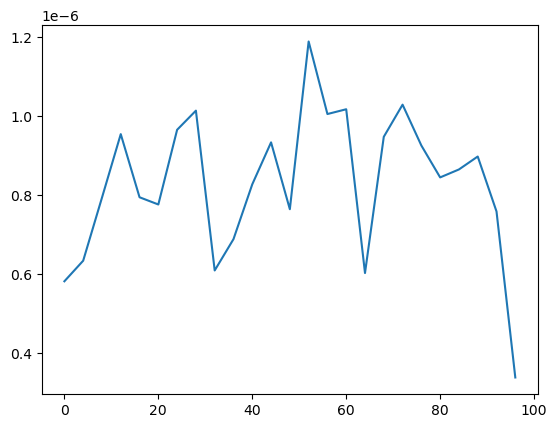

In [73]:
plt.plot(time,observed_data)
plt.show()

In [52]:
# Example parameter values (modify based on your data)
estimated_A = np.array([[0.9, 0.1], [0.1, 0.9]])
estimated_Q = np.diag([0.01, 0.01])
estimated_R = np.diag([0.1, 0.1])
initial_state_mean = np.zeros(2)
initial_state_covariance = np.diag([1.0, 1.0])
estimated_A_final, estimated_Q_final, estimated_R_final, smoothed_states_final = \
    expectation_maximization(observed_data_zero, estimated_A, estimated_Q, estimated_R,
                                            initial_state_mean, initial_state_covariance)

NameError: name 'expectation_maximization' is not defined

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

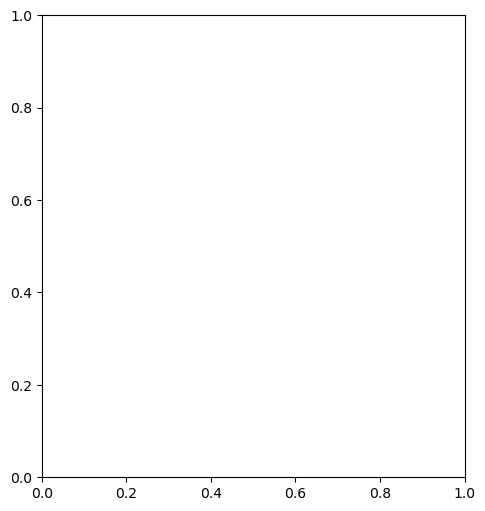

In [53]:
# Visualize the final results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(observed_data.values[:, 0], label='Observed Data 1')
plt.plot(observed_data.values[:, 1], label='Observed Data 2')
plt.title('Observed Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(smoothed_states_final[:, 0], label='Smoothed Latent State 1')
plt.plot(smoothed_states_final[:, 1], label='Smoothed Latent State 2')
plt.title('Smoothed Latent States (Final Result)')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
observed_data.values

array([1.02840313e-06, 8.85668314e-07, 9.51879480e-07, 1.21518452e-06,
       7.53181609e-07, 6.03780461e-07, 8.20828441e-07, 6.84731978e-07,
       9.50022077e-07, 4.54925782e-07, 1.14771103e-06, 1.13777794e-06,
       7.07113417e-07, 6.06832377e-07, 1.01125298e-06, 5.60882384e-07,
       6.04309369e-07, 6.73993199e-07, 8.05664345e-07, 1.10311574e-06,
       9.29767973e-07, 1.13202401e-06, 8.77638103e-07, 1.21078202e-06,
       1.02400844e-06, 1.29027349e-06, 1.30240961e-06, 1.17044330e-06,
       4.80890742e-07, 7.23080918e-07, 7.50116989e-07, 7.33871093e-07,
       1.01939598e-06, 1.19093536e-06, 6.64179587e-07, 8.37679613e-07,
       6.32613281e-07, 1.01442172e-06, 7.74773797e-07, 8.25671895e-07,
       5.03409579e-07, 6.59948531e-07, 9.88326416e-07, 1.02871973e-06,
       7.58481271e-07, 6.97624950e-07, 8.58364765e-07, 1.03869543e-06,
       9.83807365e-07, 9.64111301e-07, 1.13128022e-06, 7.69759289e-07,
       1.07952492e-06, 1.12261603e-06, 1.09740002e-06, 9.59520437e-07,
      

In [89]:
kf = KalmanFilter(n_dim_obs=1)
kf.em(observed_data.values, n_iter = 20) #, em_vars="all")
blah, ___ = kf.smooth(observed_data.values)

In [56]:
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)

In [57]:
blah1 = pd.DataFrame(blah)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (2, 61, 1) + inhomogeneous part.

In [91]:
blah.shape

(25, 1)

In [88]:
blah[0].shape

(25, 1)

In [60]:
observed_data.shape

(61,)

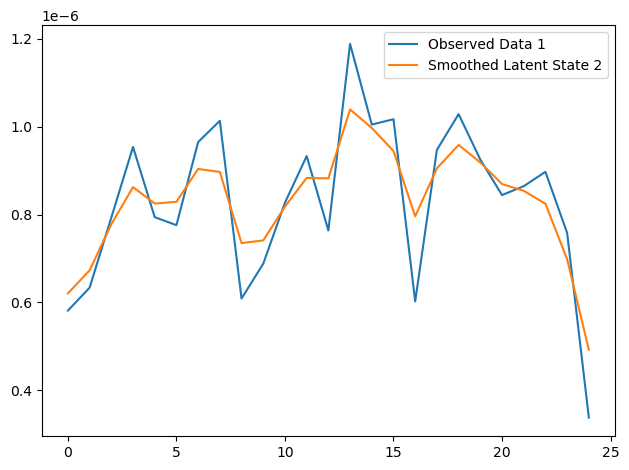

In [86]:

plt.plot(observed_data.values, label='Observed Data 1')
#plt.plot(observed_data.values[:, 1], label='Observed Data 2')
plt.plot(blah[0], label='Smoothed Latent State 2')
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
df = pd.read_csv("data/features_threshold2_with_group.csv")
df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,1,1,Happy,0.0,1,-3.422360,-3.407271,-3.395252,-3.104803,-3.037113,...,-3.441302,-3.462409,-3.453269,-3.290267,-3.381428,-3.350545,-3.449323,-3.435478,-3.291059,-3.345204
1,1,1,Happy,4.0,1,-3.258561,-3.398565,-3.314030,-3.020850,-2.975785,...,-3.360849,-3.284660,-3.381245,-3.242928,-3.325246,-3.253718,-3.299499,-3.341165,-3.215881,-3.331336
2,1,1,Happy,8.0,1,-3.284074,-3.323022,-3.356280,-2.974764,-2.917822,...,-3.299664,-3.375210,-3.320121,-3.173927,-3.312416,-3.339905,-3.355006,-3.312267,-3.160410,-3.293299
3,1,1,Happy,12.0,1,-3.201600,-3.299180,-3.311574,-3.033837,-2.982768,...,-3.293371,-3.294892,-3.260700,-3.131814,-3.310152,-3.286941,-3.291466,-3.268754,-3.149677,-3.318427
4,1,1,Happy,16.0,1,-3.358728,-3.369795,-3.354496,-3.007128,-3.015792,...,-3.351484,-3.416596,-3.298293,-3.232556,-3.264344,-3.330132,-3.355514,-3.260524,-3.200624,-3.264135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,45,-3.477286,-3.481992,-3.364156,-2.936320,-2.951800,...,-3.368272,-3.618694,-3.483955,-3.288282,-3.268125,-3.369936,-3.619288,-3.486662,-3.285683,-3.263599
30108,16,3,Disgust,164.0,45,-3.503612,-3.476807,-3.323326,-2.933907,-2.949533,...,-3.504770,-3.498274,-3.461674,-3.264564,-3.295100,-3.505706,-3.504029,-3.462277,-3.259018,-3.295507
30109,16,3,Disgust,168.0,45,-3.520455,-3.494451,-3.280831,-2.918250,-2.952944,...,-3.329556,-3.393151,-3.472894,-3.280582,-3.279309,-3.333191,-3.393081,-3.474900,-3.278928,-3.274531
30110,16,3,Disgust,172.0,45,-3.495019,-3.390789,-3.306180,-2.906062,-2.917791,...,-3.523147,-3.542632,-3.537710,-3.288601,-3.272306,-3.520470,-3.540720,-3.542245,-3.288907,-3.274443


In [107]:
grouped_data = df.groupby(['Subject','Label','Group'])

In [113]:
i = 0
for group_name, group_data in grouped_data:
    test = group_data
    i = i + 1
    print(i)
    break
    #print(f"Group: {group_name}")
    #print(group_data)
    #print("\n")

1


In [111]:
grouped_data.shape

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'

In [116]:
data = test.iloc[:,5:]
data

,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FP2_Delta,FP2_Theta,FP2_Alpha,FP2_Beta,FP2_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
152,-3.438818,-3.394261,-3.482788,-3.188304,-3.168512,-3.366892,-3.353496,-3.419518,-3.131251,-3.134347,...,-3.370797,-3.359832,-3.411662,-3.308557,-3.357191,-3.373108,-3.375508,-3.401451,-3.290564,-3.314296
153,-3.267418,-3.326335,-3.355448,-3.088269,-3.030243,-3.229622,-3.287152,-3.354318,-3.062323,-3.058296,...,-3.353790,-3.407156,-3.324995,-3.203912,-3.287381,-3.300865,-3.364150,-3.324184,-3.199904,-3.304885
154,-3.210974,-3.390832,-3.391660,-3.089601,-3.066669,-3.100983,-3.283850,-3.314433,-3.038912,-3.053722,...,-3.226833,-3.369044,-3.277499,-3.113445,-3.143861,-3.230038,-3.355102,-3.282855,-3.121647,-3.171159
155,-3.274131,-3.274193,-3.326989,-3.092092,-3.046300,-3.313016,-3.263148,-3.259278,-3.003223,-3.069262,...,-3.309893,-3.337126,-3.280360,-3.232760,-3.256361,-3.279687,-3.341486,-3.304363,-3.216274,-3.256766
156,-3.194075,-3.341216,-3.339606,-3.056727,-3.067239,-3.177346,-3.316843,-3.296266,-3.018846,-3.052467,...,-3.146135,-3.271289,-3.323360,-3.187507,-3.261081,-3.156192,-3.307818,-3.320745,-3.196971,-3.269717
157,-3.386588,-3.339039,-3.346297,-3.123534,-3.054961,-3.361496,-3.290402,-3.319865,-3.056168,-3.025217,...,-3.346935,-3.360283,-3.369918,-3.211885,-3.230935,-3.368536,-3.359885,-3.363662,-3.213953,-3.268603
158,-3.361129,-3.305252,-3.236147,-3.012673,-3.023089,-3.357494,-3.314426,-3.258597,-3.021688,-3.058288,...,-3.368854,-3.351441,-3.197422,-2.996265,-3.089141,-3.350421,-3.373447,-3.342123,-3.199194,-3.207435
159,-3.359540,-3.441203,-3.433436,-3.125140,-3.083842,-3.286233,-3.390721,-3.409441,-3.073716,-3.083094,...,-3.347860,-3.363245,-3.301049,-3.224553,-3.272552,-3.309942,-3.358500,-3.318883,-3.227316,-3.299499
160,-3.409041,-3.367347,-3.319996,-3.137515,-3.037070,-3.318092,-3.361990,-3.322193,-3.067130,-3.068458,...,-3.256078,-3.406214,-3.359340,-3.224695,-3.259467,-3.295279,-3.379576,-3.300176,-3.218217,-3.318631
161,-3.314741,-3.349351,-3.355071,-3.065967,-3.098883,-3.275253,-3.317569,-3.366516,-3.065335,-3.022894,...,-3.234609,-3.332745,-3.354298,-3.201130,-3.210177,-3.248632,-3.367470,-3.324027,-3.190670,-3.265680


In [127]:
def apply_KalmanFilter(data_col):
    kf = KalmanFilter(n_dim_obs=1)
    kf.em(data_col, n_iter = 20) #, em_vars="all")
    smoothed_data, ___ = kf.smooth(data_col)
    return smoothed_data.flatten()

In [128]:
data.apply(apply_KalmanFilter, axis = 0)

,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FP2_Delta,FP2_Theta,FP2_Alpha,FP2_Beta,FP2_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
152,-3.368570,-3.370536,-3.440504,-3.150104,-3.123311,-3.296283,-3.325792,-3.393715,-3.104689,-3.106521,...,-3.353730,-3.369175,-3.373866,-3.253276,-3.315152,-3.342737,-3.367623,-3.367999,-3.248502,-3.295960
153,-3.301700,-3.353496,-3.388431,-3.113972,-3.071695,-3.258135,-3.304536,-3.354970,-3.069004,-3.076462,...,-3.330414,-3.374342,-3.334926,-3.218477,-3.274864,-3.300870,-3.361538,-3.335634,-3.211557,-3.277673
154,-3.263342,-3.352125,-3.376513,-3.098494,-3.065034,-3.231457,-3.294191,-3.317355,-3.042696,-3.064191,...,-3.268826,-3.360838,-3.305048,-3.190107,-3.224806,-3.259010,-3.353943,-3.312790,-3.182980,-3.238349
155,-3.268537,-3.328425,-3.346153,-3.090163,-3.056601,-3.257269,-3.290335,-3.284791,-3.021699,-3.062170,...,-3.275986,-3.342664,-3.300307,-3.195576,-3.237933,-3.260236,-3.345677,-3.314836,-3.198443,-3.250969
156,-3.269081,-3.336011,-3.339126,-3.080282,-3.059339,-3.260655,-3.303541,-3.296348,-3.026633,-3.053206,...,-3.227635,-3.327642,-3.313768,-3.184632,-3.236676,-3.232536,-3.339835,-3.325591,-3.201101,-3.259107
157,-3.332003,-3.340594,-3.331514,-3.089328,-3.053510,-3.297556,-3.308400,-3.308046,-3.042497,-3.044966,...,-3.312714,-3.344683,-3.318477,-3.172418,-3.216367,-3.318370,-3.352508,-3.340376,-3.206726,-3.259042
158,-3.349529,-3.346073,-3.305903,-3.070889,-3.046107,-3.308734,-3.324553,-3.299306,-3.039172,-3.056062,...,-3.341768,-3.352849,-3.276248,-3.142784,-3.184687,-3.329601,-3.360915,-3.335798,-3.207161,-3.251586
159,-3.357407,-3.375102,-3.365218,-3.099227,-3.063667,-3.300295,-3.347061,-3.360962,-3.060386,-3.064979,...,-3.326476,-3.361817,-3.305944,-3.177824,-3.227590,-3.309867,-3.362076,-3.325960,-3.213316,-3.278263
160,-3.363512,-3.365999,-3.341481,-3.106744,-3.059348,-3.297513,-3.342170,-3.338785,-3.062893,-3.056159,...,-3.276176,-3.369971,-3.340105,-3.192238,-3.235396,-3.290021,-3.365304,-3.322007,-3.209419,-3.288522
161,-3.331752,-3.356117,-3.343899,-3.089535,-3.079188,-3.286452,-3.324839,-3.345301,-3.059454,-3.035297,...,-3.258779,-3.357504,-3.356716,-3.192325,-3.224412,-3.262355,-3.360280,-3.336207,-3.199205,-3.275505


In [126]:
apply_KalmanFilter(data.iloc[:,1]).flatten()

array([-3.37053588, -3.35349628, -3.35212518, -3.32842536, -3.33601076,
       -3.34059351, -3.34607329, -3.37510186, -3.36599859, -3.3561175 ,
       -3.35013961, -3.34036255, -3.34740858, -3.33544661, -3.33512437,
       -3.34159357, -3.34151874, -3.34639649, -3.36311174, -3.3772229 ,
       -3.34904728, -3.35562228, -3.33877298, -3.35456575, -3.34062485,
       -3.34925317, -3.34969071, -3.35156463, -3.34500384, -3.3676866 ,
       -3.36681185, -3.35572348, -3.34607338, -3.36469141, -3.38687073,
       -3.43102017, -3.48710261, -3.58747204])

In [130]:
def apply_kalman_to_group(group):
    data_columns = [col for col in group.columns if col not in ['Subject','Session','Label','Time_Slot','Group']]
    for col in data_columns:
        kf.em(group[col].values, n_iter=20)
        smoothed_data, _ = kf.smooth(group[col].values)
        group[col] = smoothed_data.flatten()
    return group

test1 = grouped_data

result_df = test1.apply(apply_kalman_to_group)
result_df

In [ ]:
for group_name, group_data in grouped_data:
    data = group_data.iloc[:,5:]
    smoothed_data = data.apply(apply_KalmanFilter)
    group_data.iloc[:,5:] = smoothed_data
    